
# Analysis of Trees within NYC Business Improvement Districts (BIDs)

## Objective
This tutorial notebook focuses on analyzing tree locations within New York City's Business Improvement Districts (BIDs) using geographic data. Students will learn how to use geospatial data in Python with `geopandas` to investigate spatial relationships between trees and BIDs.


### Data Sources
- **NYC Forestry Tree Points**: [NYC OpenData - Trees](https://data.cityofnewyork.us/Environment/Forestry-Tree-Points/k5ta-2trh/data)
- **Business Improvement Districts (BIDs)**: [NYC OpenData - BIDs](https://data.cityofnewyork.us/Business/Business-Improvement-Districts/ejxk-d93y)

### Learning Goals
- Load and preprocess geographic data using `geopandas`
- Filter and transform spatial data
- Visualize spatial distributions and explore relationships


In [1]:

# Ensure `geopandas` is installed to handle geographic data operations.
# This library is essential for working with spatial data in this tutorial.
#!pip install geopandas


In [2]:

# Import necessary libraries
# - `geopandas` for geographic data manipulation
# - `matplotlib.pyplot` for visualization
import geopandas as gpd
import matplotlib.pyplot as plt


In [3]:

# Load the trees dataset
# `trees_data` contains geographic locations of trees across NYC.
trees_data = gpd.read_file("data/forestry_tree_points.geojson")

# Load the Business Improvement Districts (BIDs) dataset
# `bid_data` includes geographic boundaries of BIDs across NYC.
bid_data = gpd.read_file('NYC_BIDS_09112015.csv')


In [4]:
trees_data

,tpcondition,stumpdiameter,riskratingdate,riskrating,objectid,globalid,tpstructure,plantingspaceglobalid,createddate,dbh,planteddate,updateddate,geometry,genusspecies
0,Excellent,None,NaT,None,86823,2B457A4C-E0E4-4E17-81C4-A5449F51C804,Retired,E814CD37-9F53-4D79-AF86-3B454F9D29B9,2015-02-28 05:00:00,22,None,2026-01-03 13:52:00,POINT (-73.81657 40.71629),Acer nigrum - black maple
1,Good,None,NaT,None,87623,37195E1A-A7EE-4AA4-8389-19A0ED5C46F7,Retired,A644AB79-A3CB-4F7F-923B-F308E615CCD4,2015-03-03 05:00:00,10,None,2019-09-18 13:12:55,POINT (-73.93848 40.81299),Fraxinus pennsylvanica - Green ash
2,Poor,None,NaT,None,88023,6BA8E72B-1901-4EF3-ABFF-D11680AB4A9B,Retired,21431016-EDB8-4A0B-B122-673125800C87,2015-03-03 05:00:00,24,None,2018-03-27 14:00:42,POINT (-73.83244 40.88763),Acer platanoides - Norway maple
3,Fair,None,2024-06-28 12:41:55,6,88823,79A5DBAF-F305-4DA1-A4B1-7A8C8D085435,Full,96FB6C55-612F-466D-9449-85A3CD2178E1,2015-03-04 05:00:00,10,None,2024-06-28 12:41:55,POINT (-74.20904 40.51958),Pyrus calleryana - Callery pear
4,Dead,None,NaT,None,88824,182F6647-D9C1-4A45-ADA0-9ADEFD1ECC60,Retired,4796B64F-906C-4345-A4E9-5CD6133642F8,2015-03-04 05:00:00,10,None,2016-10-24 02:50:43,POINT (-73.98032 40.74291),Gleditsia triacanthos var. inermis - Thornless...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105833,Fair,None,2022-10-05 03:17:23,6,13281841,CD538DB2-BEA2-41B5-8DDF-847D570B3AA6,Full,ECBD3CBB-AE60-478A-A2A9-49F1642D4976,2022-10-05 03:17:05,8,None,2022-10-05 03:17:23,POINT (-73.87236 40.87328),Fraxinus - Ash
1105834,Dead,None,NaT,None,13281842,5D019AEE-3F33-4628-8DA9-A5667E20CAD2,Full,09663A78-148A-4A38-8B8B-2CD684522D85,2022-10-05 04:17:47,3,None,NaT,POINT (-73.87214 40.87352),Fraxinus - Ash
1105835,Dead,None,2022-10-05 03:44:40,7,13281843,5A9BB1B4-01F6-42A9-9BCD-23DC2F8A4C8C,Shaft,A7EF9CE7-5380-4B99-B5CA-2E99BC0DA7B7,2022-10-05 03:44:20,6,None,2022-10-05 03:44:40,POINT (-73.87234 40.87335),Fraxinus - Ash
1105836,Fair,None,2022-10-05 04:17:03,6,13281844,264CF93B-60DF-495A-9AF8-3C3DA051B740,Full,CF1877FA-4100-4D62-BB45-F034E93A8602,2022-10-05 04:16:41,4,None,2022-10-05 04:17:03,POINT (-73.87215 40.87354),Fraxinus - Ash


In [5]:

# Filter `bid_data` to include only the BID with OBJECTID_2 = 58
# This BID will be our primary area of analysis.
bid_data_objectid_2_58 = bid_data[bid_data['OBJECTID_2'] == "58"]

# Convert BID geometry from WKT strings to proper geometry format for geospatial analysis
bid_data_objectid_2_58['the_geom'] = gpd.GeoSeries.from_wkt(bid_data_objectid_2_58['the_geom'])
bid_data_objectid_2_58 = gpd.GeoDataFrame(bid_data_objectid_2_58, geometry='the_geom')

# Use `explode` to ensure each geometry component is in a separate row, simplifying spatial analysis
exploded_58 = bid_data_objectid_2_58.explode()


/var/folders/hd/yxb3_vhx2jd_6lnsj1kg48240000gn/T/ipykernel_91370/1452983979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bid_data_objectid_2_58['the_geom'] = gpd.GeoSeries.from_wkt(bid_data_objectid_2_58['the_geom'])


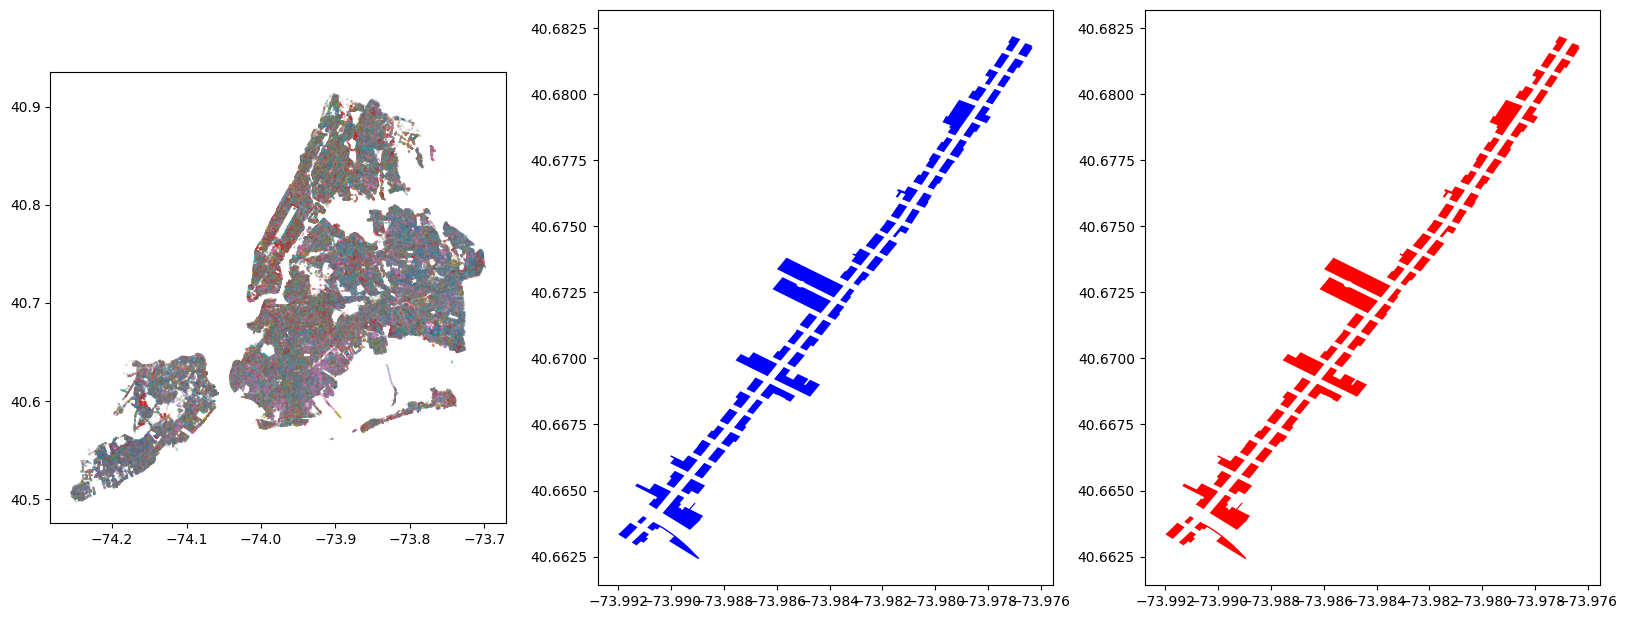

In [6]:
# plot the two datasets side by side
fig, ax = plt.subplots(1, 3,  figsize=(20, 10))
# plot the trees_data geodataframe
trees_data.plot(ax=ax[0],column='genusspecies', markersize=.001)
# plot the bid_data_objectid_2_58 geodataframe
bid_data_objectid_2_58.plot(ax=ax[1], color='blue', markersize=.01)
# plot the exploded geodataframe
exploded_58.plot(ax=ax[2], color='red', markersize=.01)

plt.show()


In [7]:
# Get the bounding box of all exploded_58 geometry
bounding_box = exploded_58.total_bounds

# Filter trees_data to include only trees within the bounding box
trees_within_bbox = trees_data.cx[bounding_box[0]:bounding_box[2], bounding_box[1]:bounding_box[3]]


# how many trees are within the bounding box
print("Number of trees within the bounding box: ", trees_within_bbox.shape[0])

Number of trees within the bounding box:  6421


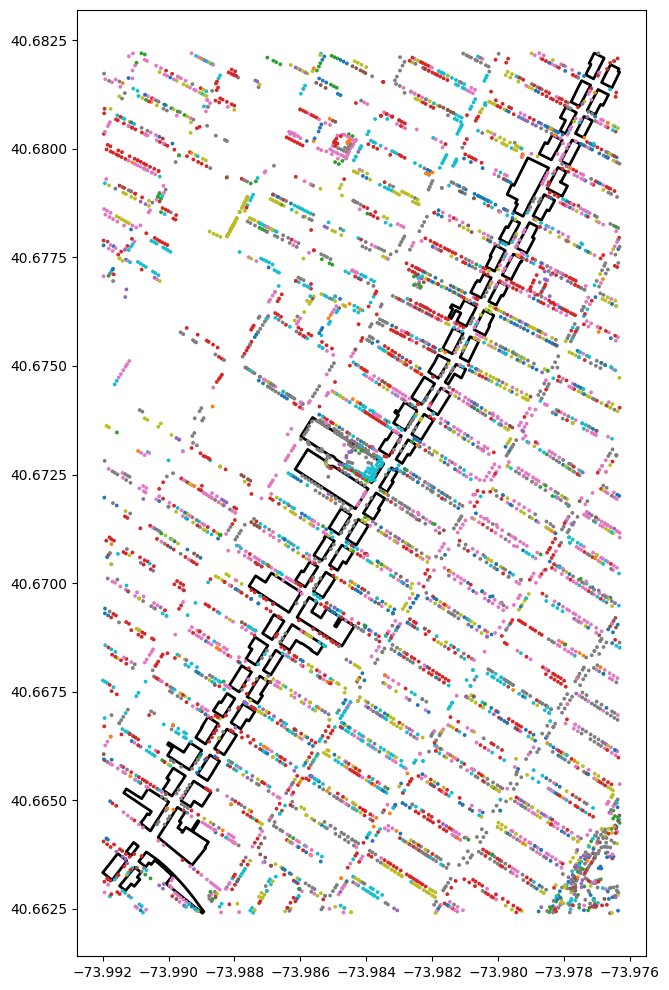

In [8]:
# Create a figure and axes with the desired size
fig, ax = plt.subplots(figsize=(10,10))

# Plot exploded_58 on the axes
exploded_58.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2)

# Plot trees_within_bbox on the same axes
trees_within_bbox.plot(ax=ax, column='genusspecies', markersize=3)
# Optionally, you can adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [9]:
# this function takes a block geometry and returns the number of trees within 200 meters of the block
def count_nearby_trees(block_geom, trees_within_bbox, s_index,  dist=200):
    """
    Count the number of trees within 200 meters of a block.

    Parameters:
    block_geom (shapely.geometry.Polygon): A polygon representing the block. 
    trees_within_bbox (geopandas.GeoDataFrame): A GeoDataFrame containing trees within the bounding box of the block.
    s_index (rtree.index.Index): A spatial index for quickly filtering nearby trees.
    dist (float): The distance within which trees will be counted (default is 200 meters).

    Returns:
    int: The number of trees within 200 meters or dist of the block.
    """

    # Check if the geometry is invalid or empty
    if block_geom is None or block_geom.is_empty:
        return 0
    
    # Create a bounding box around the block to quickly filter nearby trees using the spatial index
    possible_matches_index = list(s_index.intersection(block_geom.bounds))
    possible_matches = trees_within_bbox.iloc[possible_matches_index]

    # Count the trees within 20 meters of the block
    return possible_matches['geometry'].apply(lambda x: block_geom.distance(x) <dist).sum()

In [10]:
# for each block, count the number of tree points that are less than 20 meters away from the block

# create a new column in exploded_58 to store the count of trees
exploded_58['tree_count'] = 0

# Create a spatial index for the trees
tree_sindex = trees_within_bbox.sindex


# Apply the function to each row in exploded_58
exploded_58['tree_count'] = exploded_58['the_geom'].apply(count_nearby_trees, trees_within_bbox=trees_within_bbox, s_index=tree_sindex, dist=20)

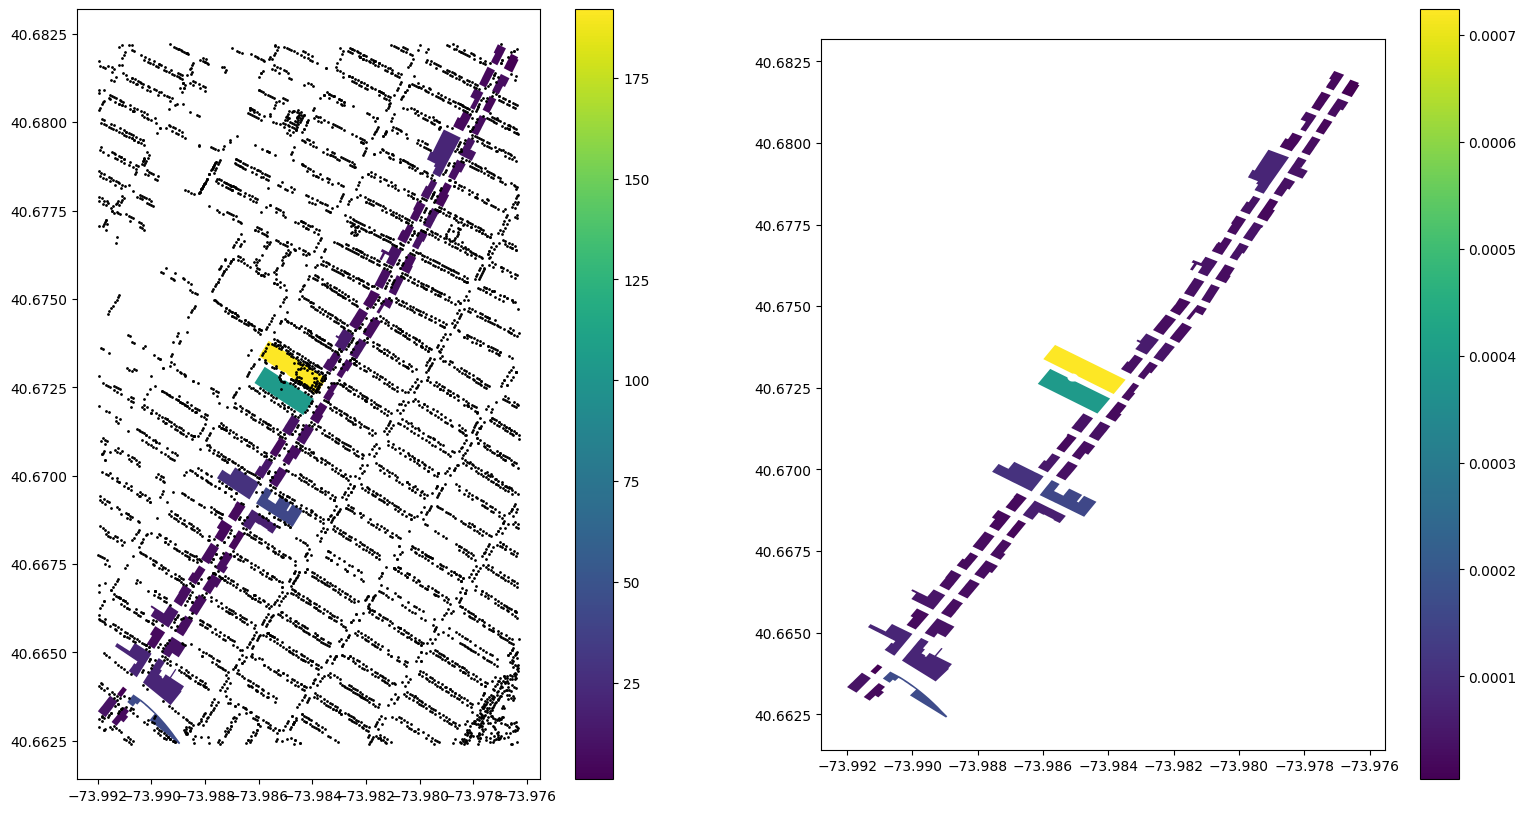

In [11]:
# average the count of trees for each block based on the area of the block and store the result in a new column
# Shape_Area is a string, convert it to float

exploded_58['Shape_Area'] = exploded_58['Shape_Area'].astype(float)

# Calculate the average tree count per square meter
exploded_58['avg_tree_density'] = exploded_58['tree_count'] / exploded_58['Shape_Area']



# plot the two datasets side by side
fig, ax = plt.subplots(1, 2,  figsize=(20, 10))
exploded_58.plot(column='tree_count', legend=True, ax=ax[0])
# plot the trees on top of the BID as black dots
trees_within_bbox.plot(ax=ax[0], markersize=1, color='black')
exploded_58.plot(column='avg_tree_density', legend=True, ax=ax[1])
plt.show()

/var/folders/hd/yxb3_vhx2jd_6lnsj1kg48240000gn/T/ipykernel_91370/531979002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bid_data_objectid_2_3['the_geom'] = gpd.GeoSeries.from_wkt(bid_data_objectid_2_3['the_geom'])


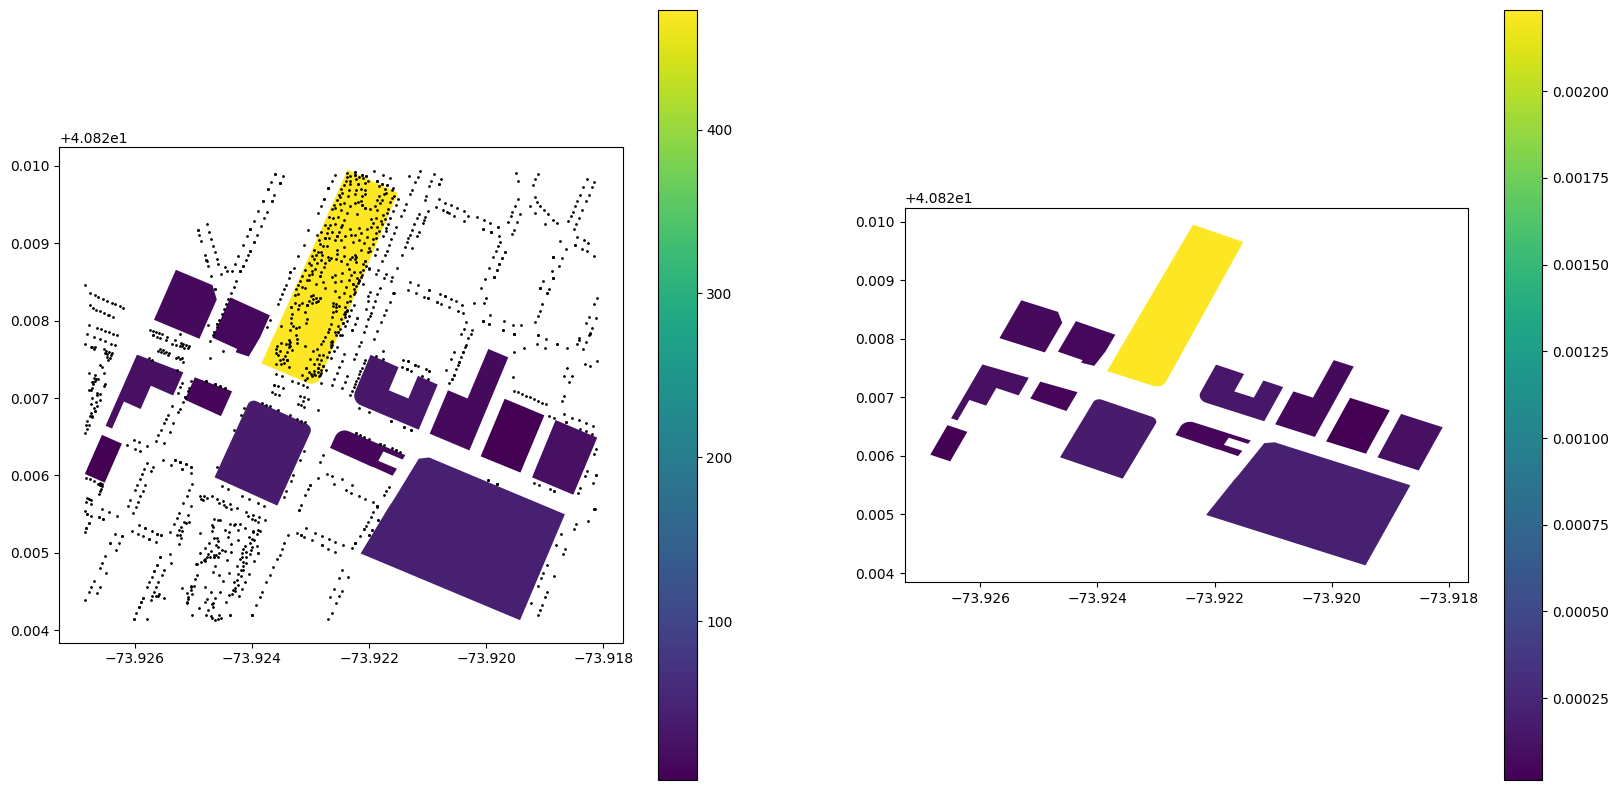

In [12]:
# now do the same analysis for another BID with OBJECTID_2 = 3
bid_data_objectid_2_3 = bid_data[bid_data['OBJECTID_2'] == "3"]

# Convert BID geometry from WKT strings to proper geometry format for geospatial analysis
bid_data_objectid_2_3['the_geom'] = gpd.GeoSeries.from_wkt(bid_data_objectid_2_3['the_geom'])

bid_data_objectid_2_3 = gpd.GeoDataFrame(bid_data_objectid_2_3, geometry='the_geom')

# Use `explode` to ensure each geometry component is in a separate row, simplifying spatial analysis
exploded_3 = bid_data_objectid_2_3.explode()

# Get the bounding box of all exploded_3 geometry
bounding_box_3 = exploded_3.total_bounds


# Filter trees_data to include only trees within the bounding box
trees_within_bbox_3 = trees_data.cx[bounding_box_3[0]:bounding_box_3[2], bounding_box_3[1]:bounding_box_3[3]]


# create a new column in exploded_3 to store the count of trees
exploded_3['tree_count'] = 0

# Create a spatial index for the trees
tree_sindex_3 = trees_within_bbox_3.sindex

# Apply the function to each row in exploded_3
exploded_3['tree_count'] = exploded_3['the_geom'].apply(count_nearby_trees, trees_within_bbox=trees_within_bbox_3, s_index=tree_sindex_3, dist=200)

# average the count of trees for each block based on the area of the block and store the result in a new column
# Shape_Area is a string, convert it to float

exploded_3['Shape_Area'] = exploded_3['Shape_Area'].astype(float)

# Calculate the average tree count per square meter
exploded_3['avg_tree_density'] = exploded_3['tree_count'] / exploded_3['Shape_Area']

# plot the two datasets side by side
fig, ax = plt.subplots(1, 2,  figsize=(20, 10))
exploded_3.plot(column='tree_count', legend=True, ax=ax[0])
# plot the trees on top of the BID as black dots
trees_within_bbox_3.plot(ax=ax[0], markersize=1, color='black')

exploded_3.plot(column='avg_tree_density', legend=True, ax=ax[1])

plt.show()


## Conclusion and Next Steps

In this notebook, we explored how to preprocess and analyze spatial data for NYC trees within specific Business Improvement Districts. This process involved filtering, converting data into geospatial formats, and preparing it for further analysis or visualization.

### Suggested Extensions
- Explore additional BIDs or perform a city-wide analysis.
- Visualize tree density across different BIDs and correlate with urban green space availability.
- Integrate other environmental or socio-economic data to enhance the analysis.